Main Objectives:

The primary objective of this project is to utilize time series modeling techniques to identify the top 5 zip codes for investment opportunities for a fictional real estate investment firm. The focus will predominantly be on maximizing profit margins.

Problem Statement:

The real estate investment firm has tasked us, as consultants, with identifying the top 5 zip codes for investment opportunities. In this context, "best" is defined primarily in terms of profit margins. The recommendation should prioritize zip codes with the highest potential for profitability, based on historical real estate price data.


Key Questions to Address:

1.How can profit margins be maximized through the selection of zip codes for investment?
2.Which time series modeling techniques are most suitable for predicting real estate prices and identifying profitable investment opportunities?
3.How will the recommendation incorporate considerations of risk and uncertainty associated with real estate investments?
4.What strategies can be employed to communicate the recommendation effectively to stakeholders?

Key Deliverables:

-Identification of the top 5 zip codes with the highest potential for profit margins.
-Time series models forecasting real estate prices for the selected zip codes.
-Analysis of profit potential, considering factors such as historical price trends, volatility, and investment horizon.
-Evaluation of the robustness of the recommendation and sensitivity to changes in assumptions.
-Presentation of findings through clear visualizations and a compelling narrative to facilitate decision-making by stakeholders.

In [1]:
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pmdarima


In [3]:
pip install --upgrade phoenix


Note: you may need to restart the kernel to use updated packages.


# Import necessary libraries

In [4]:

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure plots are displayed inline
%matplotlib inline

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Suppress specific warning
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# Set seaborn style
sns.set()

# Importing required libraries for time series analysis
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error as calc_MSE
from math import sqrt
from matplotlib.pylab import rcParams


# Data Loading

In [5]:
# displaying all columns
pd.set_option("display.max_columns",None)
# load the data from the csv file
df = pd.read_csv('zillow_data.csv')
# display the first 5 rows
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,

# Data Cleaning

In [6]:
# creating a column of %ROI
df["%ROI"] = ((df["2018-04"] / df["2012-01"]) ** (1 / (2018-2012)) - 1) * 100


In [7]:
# creating a column of actual ROI
df['ROI price'] = df["2018-04"] - df["2012-01"]-1

In [8]:
# Check the columns in the dataset
df.columns


Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02',
       '2018-03', '2018-04', '%ROI', 'ROI price'],
      dtype='object', length=274)

In [9]:
# Check the shape of the dataset
df.shape

(14723, 274)

In [10]:
# Check information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 274 entries, RegionID to ROI price
dtypes: float64(221), int64(49), object(4)
memory usage: 30.8+ MB


In [11]:
# Descriptive statistics of the data
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,%ROI,ROI price
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.380500e+04,1.380500e+04,1.380500e+04,1.380500e+04,1.380500e+04,1.380500e+04,1.383600e+04,1.383600e+04,1.383600e+04,1.383600e+04,1.383600e+04,1.383600e+04,1.385700e+04,1.385700e+04,1.385700e+04,1.385700e+04,1.385700e+04,1.385700e+04,1.390900e+04,1.390900e+04,1.392200e+04,1.392200e+04,1.392200e+04,1.392200e+04,1.400000e+04,1.400000e+04,1.400000e+04,1.400000e+04,1.400000e+04,1.400000e+04,1.405600e+04,1.405600e+04,1.405600e+04,1.405600e+04,1.405600e+04,1.405600e+04,1.408300e+04,1.408300e+04,1.408300e+04,1.408300e+04,1.408300e+04,1.408300e+04,1.410300e+04,1.410300e+04,1.410300e+04,1.410300e+04,1.410300e+04,1.410300e+04,1.411000e+04,1.411000e+04,1.411000e

In [12]:
# Convert wide format data to long format
long_data = pd.melt(df, 
                    id_vars=['RegionID', 'RegionName', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', '%ROI', 'ROI price'], 
                    var_name='Date')

# Rename the RegionName column to Zipcode
long_data = long_data.rename(columns={'RegionName': 'Zipcode', 'value': 'Price'})

# Convert Zipcode to categorical data type
long_data['Zipcode'] = long_data['Zipcode'].astype('str')

# Convert Date to datetime format
long_data['Date'] = pd.to_datetime(long_data['Date'], format='%Y-%m')

long_data.head()


,RegionID,Zipcode,SizeRank,City,State,Metro,CountyName,%ROI,ROI price,Date,Price
0,84654,60657,1,Chicago,IL,Chicago,Cook,5.730851,292899.0,1996-04-01,334200.0
1,90668,75070,2,McKinney,TX,Dallas-Fort Worth,Collin,8.285652,122199.0,1996-04-01,235700.0
2,91982,77494,3,Katy,TX,Houston,Harris,4.828700,81299.0,1996-04-01,210400.0
3,84616,60614,4,Chicago,IL,Chicago,Cook,5.856559,378099.0,1996-04-01,498100.0
4,93144,79936,5,El Paso,TX,El Paso,El Paso,1.305960,9099.0,1996-04-01,77300.0


In [13]:
# check columns of long data
long_data.shape

(3901595, 11)

In [14]:
# Descriptive statistics of the data
long_data.describe()

,RegionID,SizeRank,%ROI,ROI price,Date,Price
count,3.901595e+06,3.901595e+06,3.842235e+06,3.842235e+06,3901595,3.744704e+06
mean,8.107501e+04,7.362000e+03,5.468191e+00,8.927807e+04,2007-04-01 18:12:13.584906496,2.076064e+05
min,5.819600e+04,1.000000e+00,-8.800055e+00,-6.940100e+04,1996-04-01 00:00:00,1.130000e+04
25%,6.717400e+04,3.681000e+03,2.854330e+00,2.279900e+04,2001-10-01 00:00:00,9.790000e+04
50%,7.800700e+04,7.362000e+03,4.678817e+00,4.739900e+04,2007-04-01 00:00:00,1.476000e+05
75%,9.092100e+04,1.104300e+04,7.509623e+00,9.899900e+04,2012-10-01 00:00:00,2.372000e+05
max,7.538440e+05,1.472300e+04,2.282181e+01,5.827699e+06,2018-04-01 00:00:00,1.931490e+07
std,3.193304e+04,4.250165e+03,3.654485e+00,1.630284e+05,NaN,2.400207e+05


In [15]:
# Descriptive statistics of the data
long_data.describe()

,RegionID,SizeRank,%ROI,ROI price,Date,Price
count,3.901595e+06,3.901595e+06,3.842235e+06,3.842235e+06,3901595,3.744704e+06
mean,8.107501e+04,7.362000e+03,5.468191e+00,8.927807e+04,2007-04-01 18:12:13.584906496,2.076064e+05
min,5.819600e+04,1.000000e+00,-8.800055e+00,-6.940100e+04,1996-04-01 00:00:00,1.130000e+04
25%,6.717400e+04,3.681000e+03,2.854330e+00,2.279900e+04,2001-10-01 00:00:00,9.790000e+04
50%,7.800700e+04,7.362000e+03,4.678817e+00,4.739900e+04,2007-04-01 00:00:00,1.476000e+05
75%,9.092100e+04,1.104300e+04,7.509623e+00,9.899900e+04,2012-10-01 00:00:00,2.372000e+05
max,7.538440e+05,1.472300e+04,2.282181e+01,5.827699e+06,2018-04-01 00:00:00,1.931490e+07
std,3.193304e+04,4.250165e+03,3.654485e+00,1.630284e+05,NaN,2.400207e+05


In [16]:
# Checking for duplicates within the dataset
print(f'The number of duplicates within the dataset is: {long_data.duplicated().sum()}')


The number of duplicates within the dataset is: 0


In [17]:
# Checking for missing values
missing_percentage = long_data.isna().sum() / len(long_data) * 100
print(f'Percentage of missing values in each column:\n{missing_percentage}')


Percentage of missing values in each column:
RegionID      0.000000
Zipcode       0.000000
SizeRank      0.000000
City          0.000000
State         0.000000
Metro         7.084154
CountyName    0.000000
%ROI          1.521429
ROI price     1.521429
Date          0.000000
Price         4.021202
dtype: float64


In [18]:
# Fill missing values in the 'Metro' column with 'missing'
long_data['Metro'] = long_data['Metro'].fillna('missing')

# Checking for missing values after filling 'Metro' column
missing_percentage = long_data.isna().sum() / len(long_data) * 100
print(f'Percentage of missing values in each column after filling the "Metro" column:\n{missing_percentage}')


Percentage of missing values in each column after filling the "Metro" column:
RegionID      0.000000
Zipcode       0.000000
SizeRank      0.000000
City          0.000000
State         0.000000
Metro         0.000000
CountyName    0.000000
%ROI          1.521429
ROI price     1.521429
Date          0.000000
Price         4.021202
dtype: float64


In [19]:
# Statistical description of numerical variables
num_description = long_data.describe()
print("Statistical summary of numerical variables:\n", num_description)


Statistical summary of numerical variables:
            RegionID      SizeRank          %ROI     ROI price  \
count  3.901595e+06  3.901595e+06  3.842235e+06  3.842235e+06   
mean   8.107501e+04  7.362000e+03  5.468191e+00  8.927807e+04   
min    5.819600e+04  1.000000e+00 -8.800055e+00 -6.940100e+04   
25%    6.717400e+04  3.681000e+03  2.854330e+00  2.279900e+04   
50%    7.800700e+04  7.362000e+03  4.678817e+00  4.739900e+04   
75%    9.092100e+04  1.104300e+04  7.509623e+00  9.899900e+04   
max    7.538440e+05  1.472300e+04  2.282181e+01  5.827699e+06   
std    3.193304e+04  4.250165e+03  3.654485e+00  1.630284e+05   

                                Date         Price  
count                        3901595  3.744704e+06  
mean   2007-04-01 18:12:13.584906496  2.076064e+05  
min              1996-04-01 00:00:00  1.130000e+04  
25%              2001-10-01 00:00:00  9.790000e+04  
50%              2007-04-01 00:00:00  1.476000e+05  
75%              2012-10-01 00:00:00  2.372000e+05 

In [20]:
# Statistical description of categorical variables
cat_description = long_data.describe(include=['object'])
print("Statistical summary of categorical variables:\n", cat_description)


Statistical summary of categorical variables:
         Zipcode      City    State    Metro   CountyName
count   3901595   3901595  3901595  3901595      3901595
unique    14723      7554       51      702         1212
top       60657  New York       CA  missing  Los Angeles
freq        265     30210   324360   276395        69960


# EDA

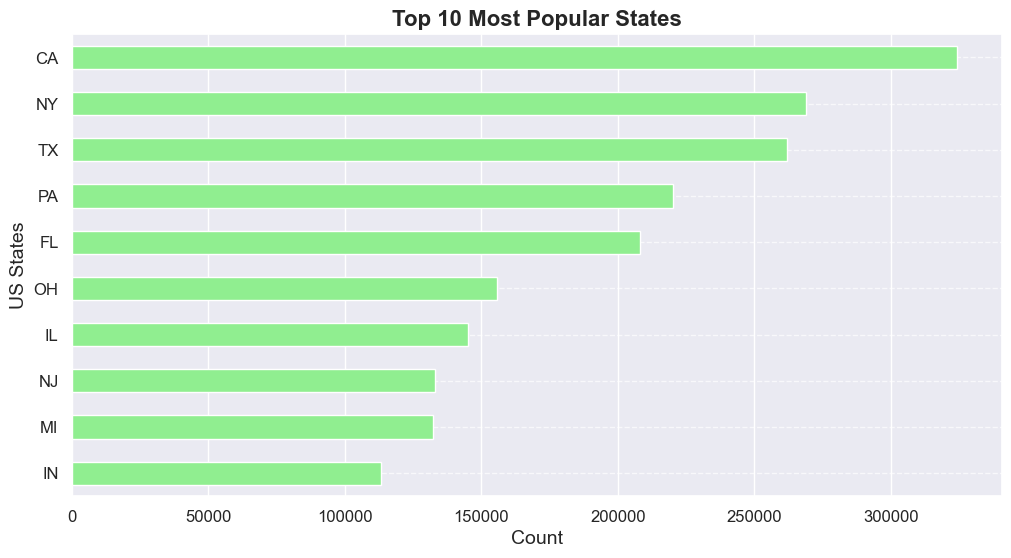

In [21]:
# Plotting the most popular states in the dataset
plt.figure(figsize=(12, 6))
long_data['State'].value_counts()[:10].sort_values().plot(kind="barh", color='lightgreen')
plt.xlabel("Count", fontsize=14)
plt.ylabel("US States", fontsize=14)
plt.title("Top 10 Most Popular States", fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Carlifonia is the most popular state.

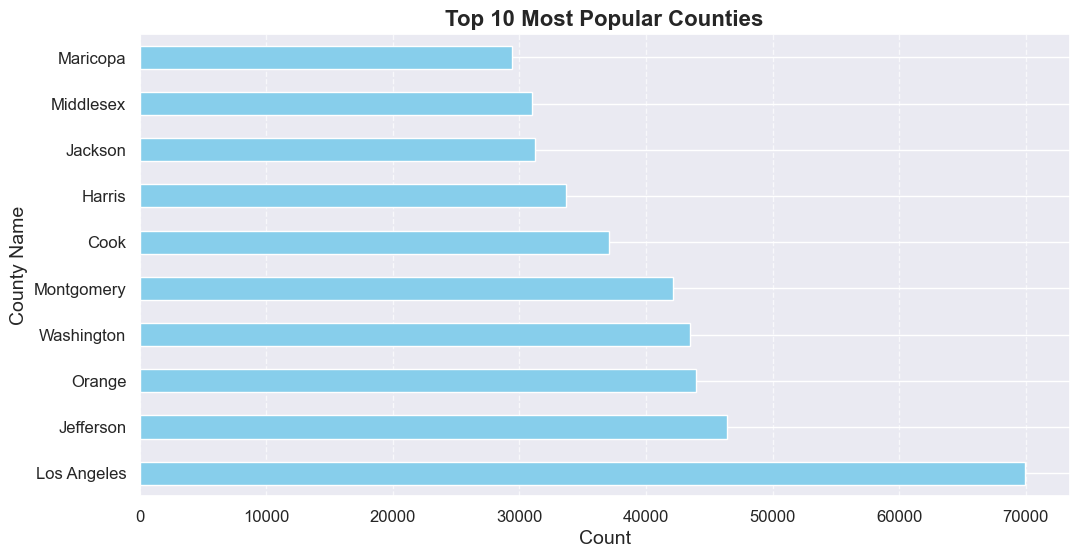

In [22]:
# Plotting the most popular counties in the dataset
plt.figure(figsize=(12, 6))
long_data['CountyName'].value_counts()[:10].sort_values().plot(kind="barh", color='skyblue')
plt.xlabel("Count", fontsize=14)
plt.ylabel("County Name", fontsize=14)
plt.title("Top 10 Most Popular Counties", fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


L.A. is the most popular county

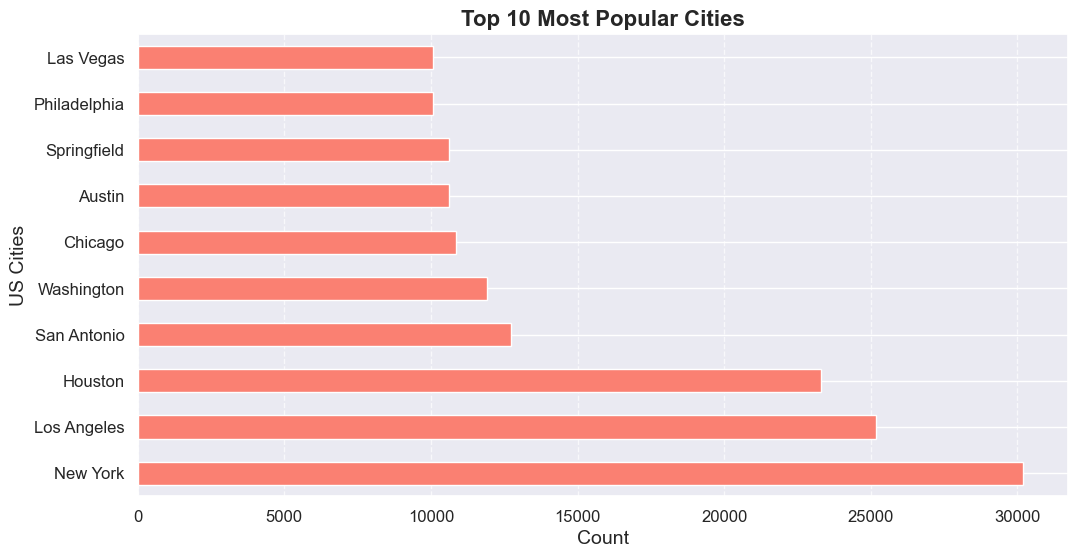

In [25]:
# Plotting the most popular cities in the dataset
plt.figure(figsize=(12, 6))
long_data['City'].value_counts()[:10].sort_values().plot(kind="barh", color='salmon')
plt.xlabel("Count", fontsize=14)
plt.ylabel("US Cities", fontsize=14)
plt.title("Top 10 Most Popular Cities", fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


New York is the most popular city

In [27]:
# Grouping data by mean %ROI and selecting top 30 zipcodes
grouped_roi = long_data.groupby('Zipcode')
roi_mean = grouped_roi['%ROI'].mean()
roi_mean_df = roi_mean.reset_index(name='% ROI')
roi_mean_df = roi_mean_df.sort_values(by='% ROI', ascending=False)
top_30_zipcodes_roi = roi_mean_df.head(10)


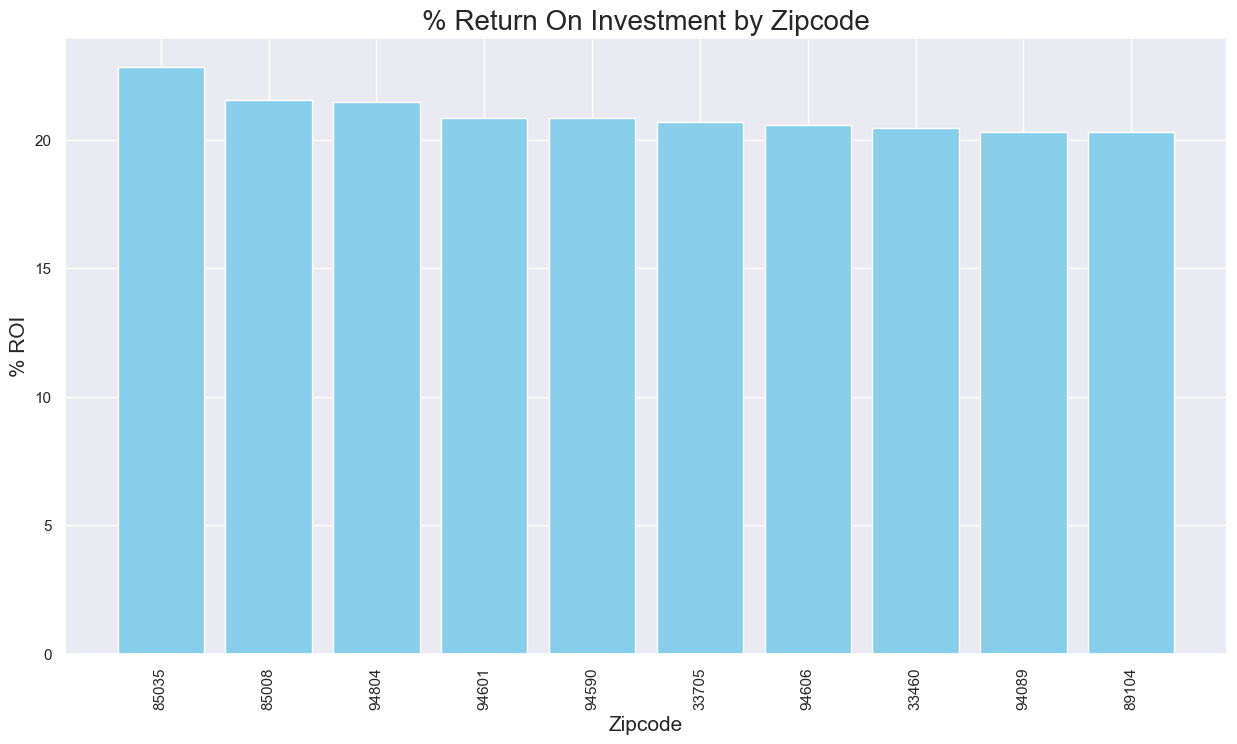

In [28]:
# Plotting the %ROI by zipcode
plt.figure(figsize=(15, 8))
plt.bar(top_30_zipcodes_roi['Zipcode'], top_30_zipcodes_roi['% ROI'], color='skyblue')
plt.xlabel('Zipcode', fontsize=15)
plt.ylabel('% ROI', fontsize=15)
plt.title('% Return On Investment by Zipcode', fontsize=20)
plt.xticks(rotation=90)
plt.show()


According to the chart, it appears that zipcode 85035 stands out as the most lucrative area, boasting a substantial 22.8% return on investment (ROI) between 2012 and 2018.

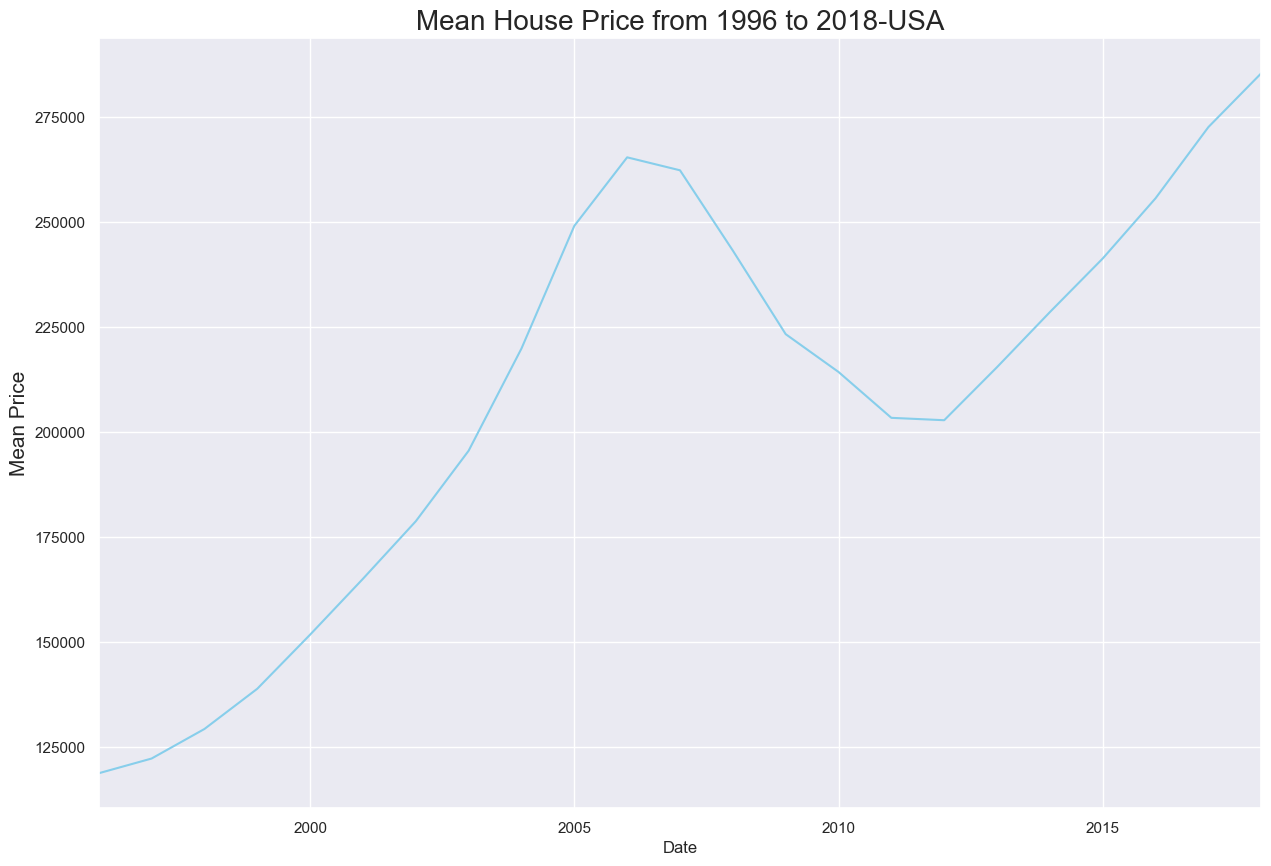

In [29]:
# Creating a data series to check the prices of houses over time
time_series = long_data.copy()
time_series.set_index("Date", inplace=True)
time_series = time_series["Price"]

# Plotting mean house price
plt.figure(figsize=(15, 10))
time_series.resample("A").mean().plot(color='skyblue')
plt.ylabel("Mean Price", fontsize=15)
plt.title("Mean House Price from 1996 to 2018-USA", fontsize=20)
plt.show()


This indicates an upward trend in housing prices from 1996 to 2008, followed by a sharp decline during the housing market crash. Subsequently, prices stabilized around 2012, after which they began to rise again until 2018.

# Data Preprocessing

When working with time series models, it's typically assumed that the data is stationary, meaning that its mean, variance, and autocorrelation remain constant across different time periods.

Having a stationary time series simplifies the model development process and ensures efficiency. Before proceeding with modeling, the data undergoes checks for stationarity through methods like the Dickey Fuller test and examining rolling means.

If the data is found to be non-stationary, differencing is applied to transform it into a stationary form.

In [31]:


# Check for non-numeric values in the 'Price' column
non_numeric_values = long_data[~long_data['Price'].apply(lambda x: str(x).replace('.', '').isdigit())]

# Handle non-numeric values (replace with NaN in this example)
long_data['Price'] = pd.to_numeric(long_data['Price'], errors='coerce')

# Drop rows with NaN values in the 'Price' column
long_data.dropna(subset=['Price'], inplace=True)

# Filter data for the top 5 zipcodes based on %ROI
zipcode = long_data.sort_values('%ROI', ascending=False)['Zipcode'].unique()[:5]
top_5 = long_data[long_data['Zipcode'].isin(zipcode)]

# Group data by date and zipcode, and calculate the mean price for each group starting from 2012
grouped_5 = top_5.groupby(['Date', 'Zipcode'])['Price'].mean().reset_index()
final_df = grouped_5[grouped_5['Date'] >= "2005-01-01"]

# Check the columns present in final_df
print(final_df.columns)

# Drop unnecessary columns if they exist
columns_to_drop = ['RegionID', 'SizeRank', '%ROI', 'ROI price']
final_df.drop(columns_to_drop, axis=1, errors='ignore', inplace=True)

# Set Date as index
final_df.set_index('Date', inplace=True)


Index(['Date', 'Zipcode', 'Price'], dtype='object')


# Visualizing Home Prices:

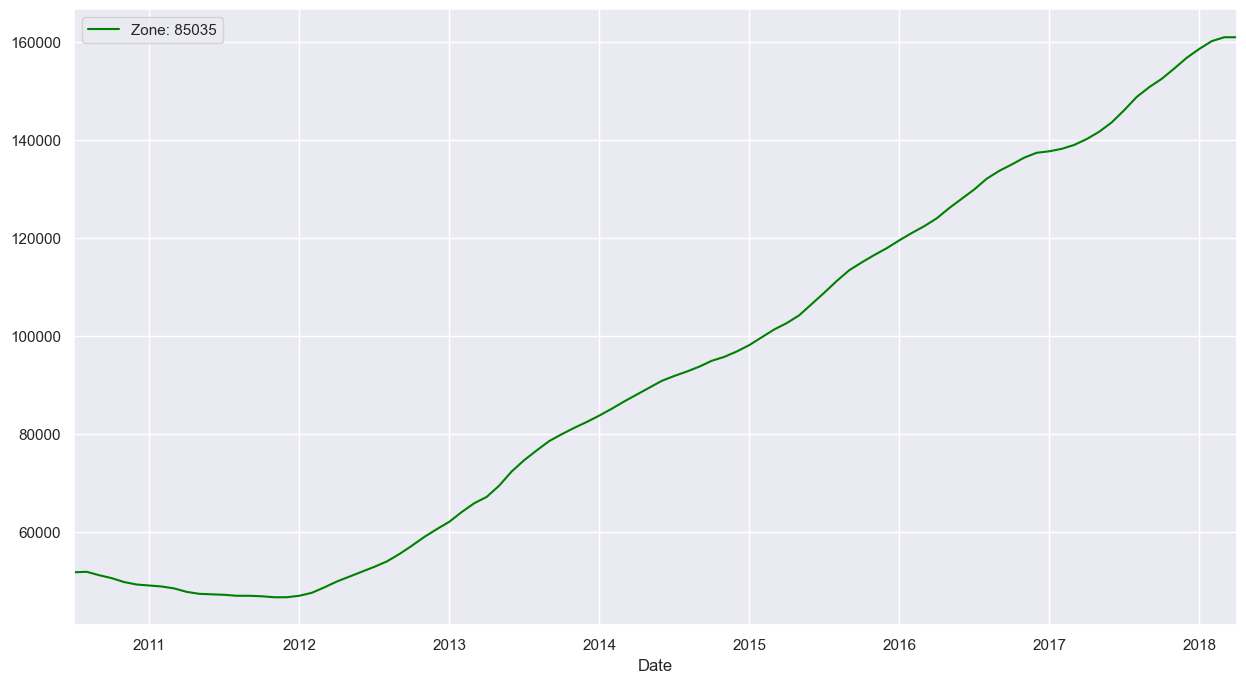

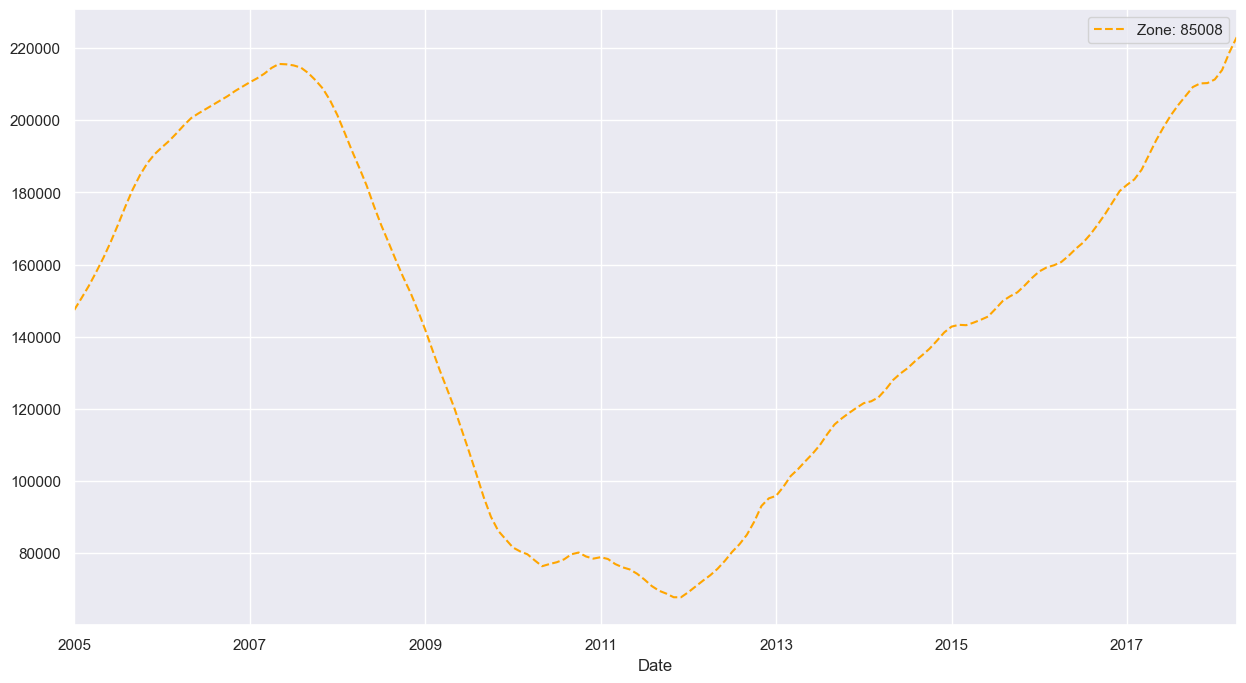

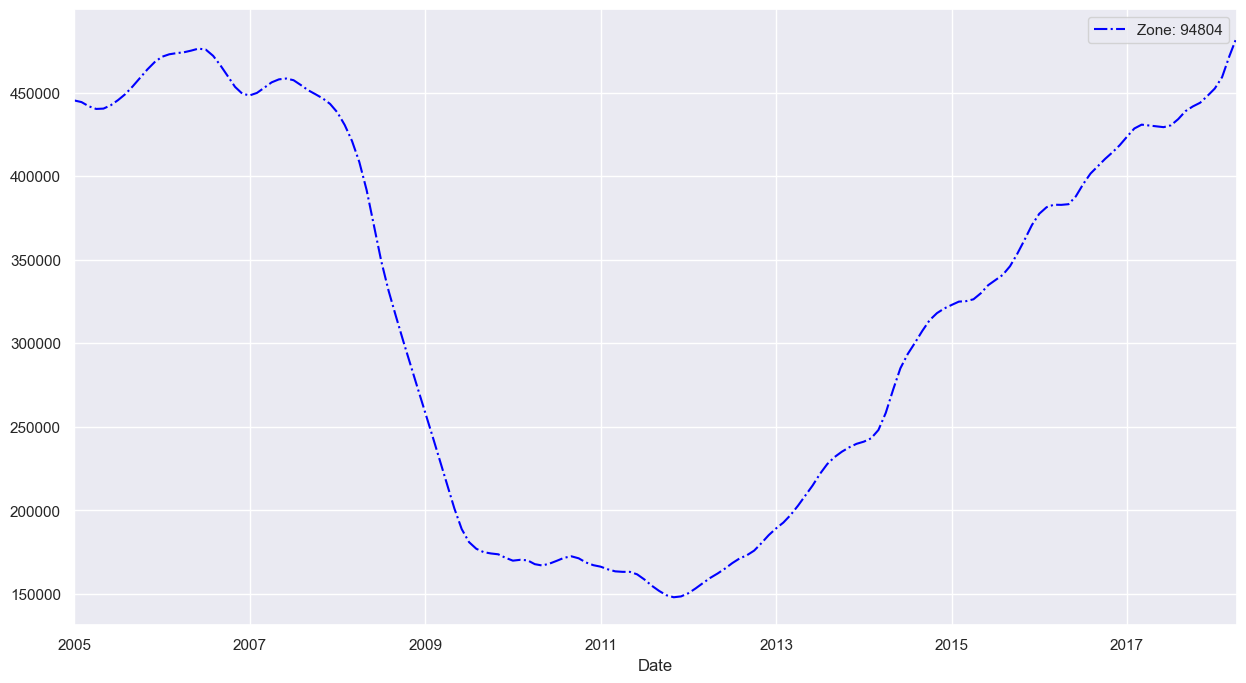

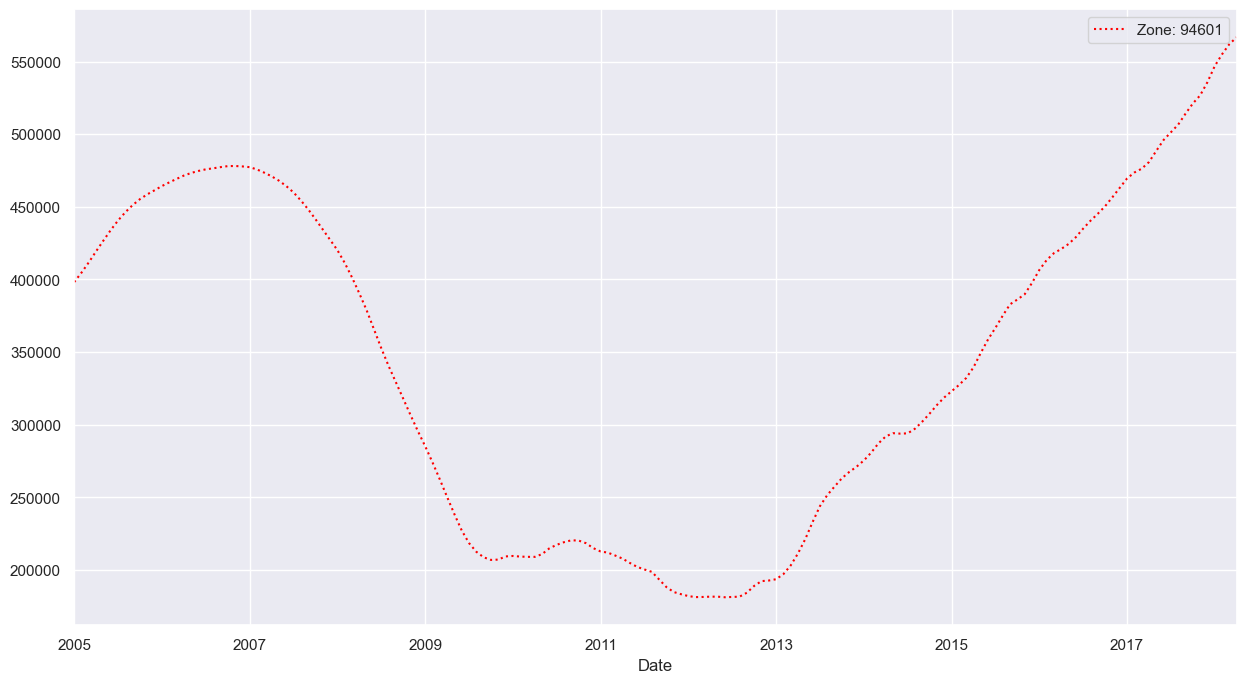

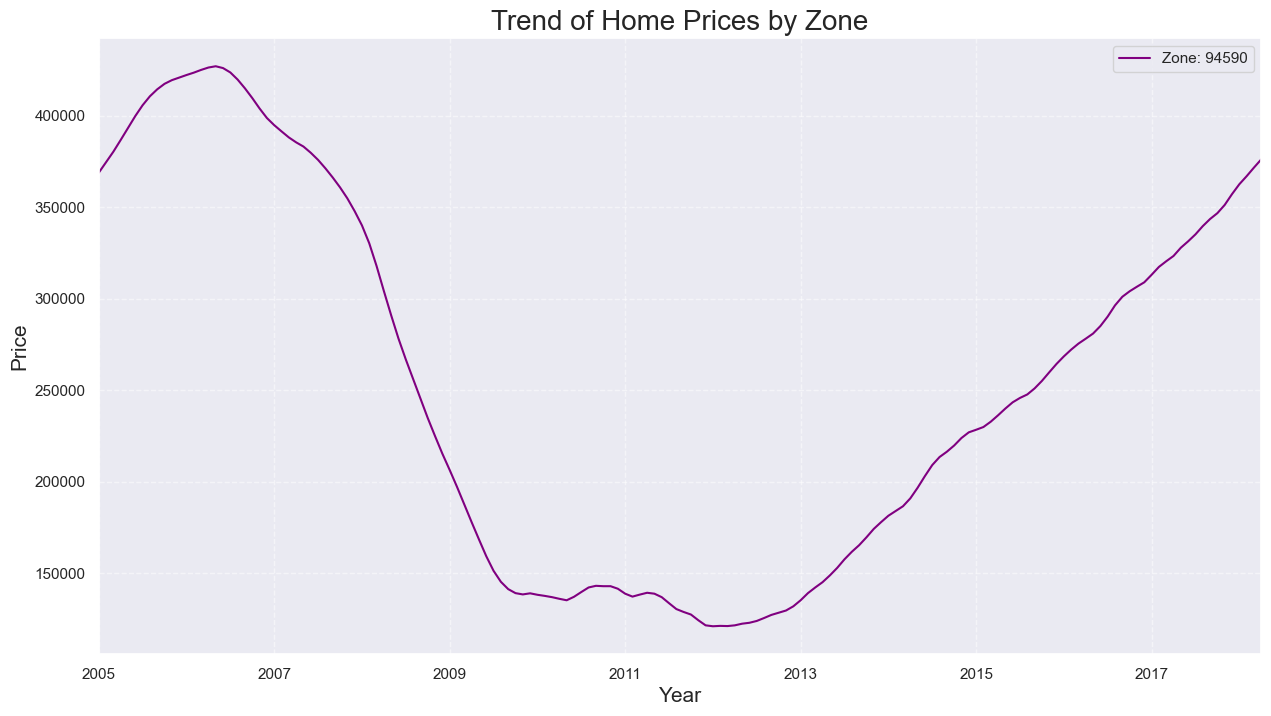

In [32]:
# Plotting home prices by zipcodes
colors = ['green', 'orange', 'blue', 'red', 'purple']  
line_styles = ['-', '--', '-.', ':', '-']  

for i in range(5):
    final_df[final_df['Zipcode'] == zipcode[i]].plot(y='Price', 
                                                      label=f"Zone: {zipcode[i]}", 
                                                      color=colors[i],
                                                      linestyle=line_styles[i],
                                                      figsize=(15, 8))
plt.title("Trend of Home Prices by Zone", fontsize=20)  
plt.xlabel('Year', fontsize=15)  
plt.ylabel('Price', fontsize=15) 
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)  
plt.show()


# Calculating and Visualizing Monthly Returns:

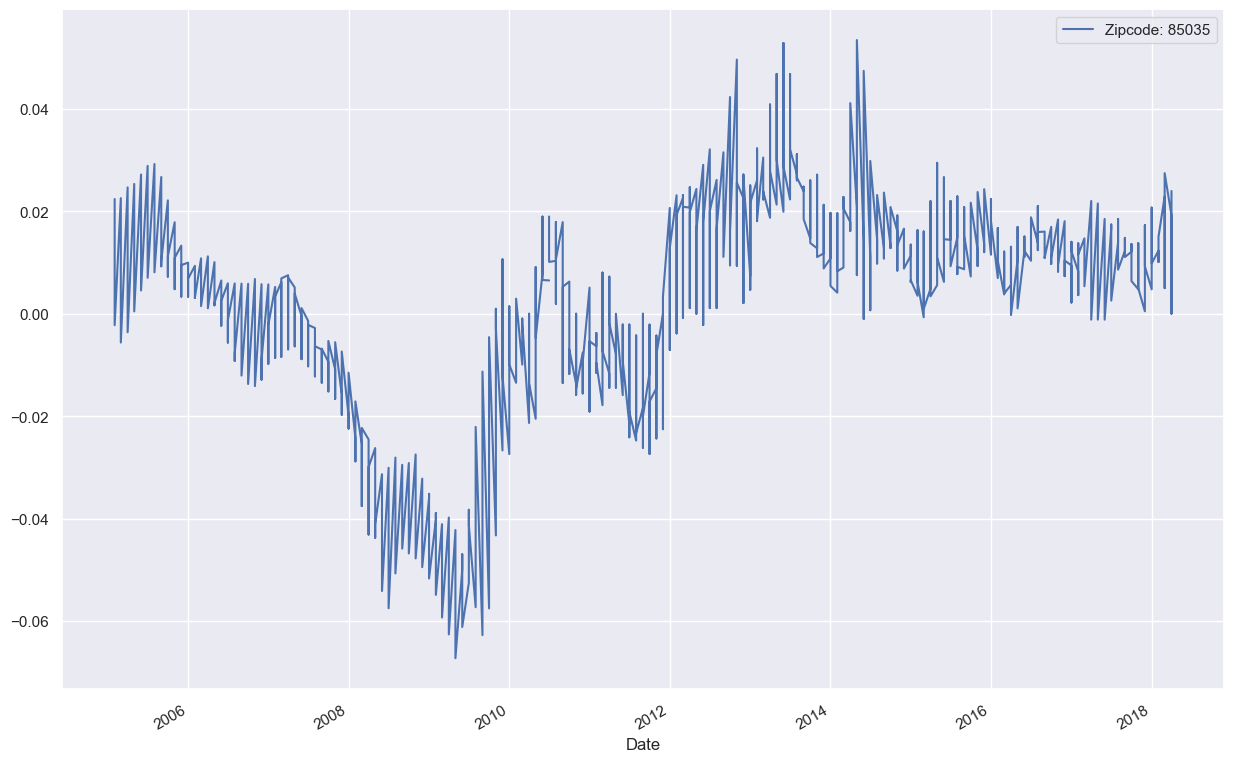

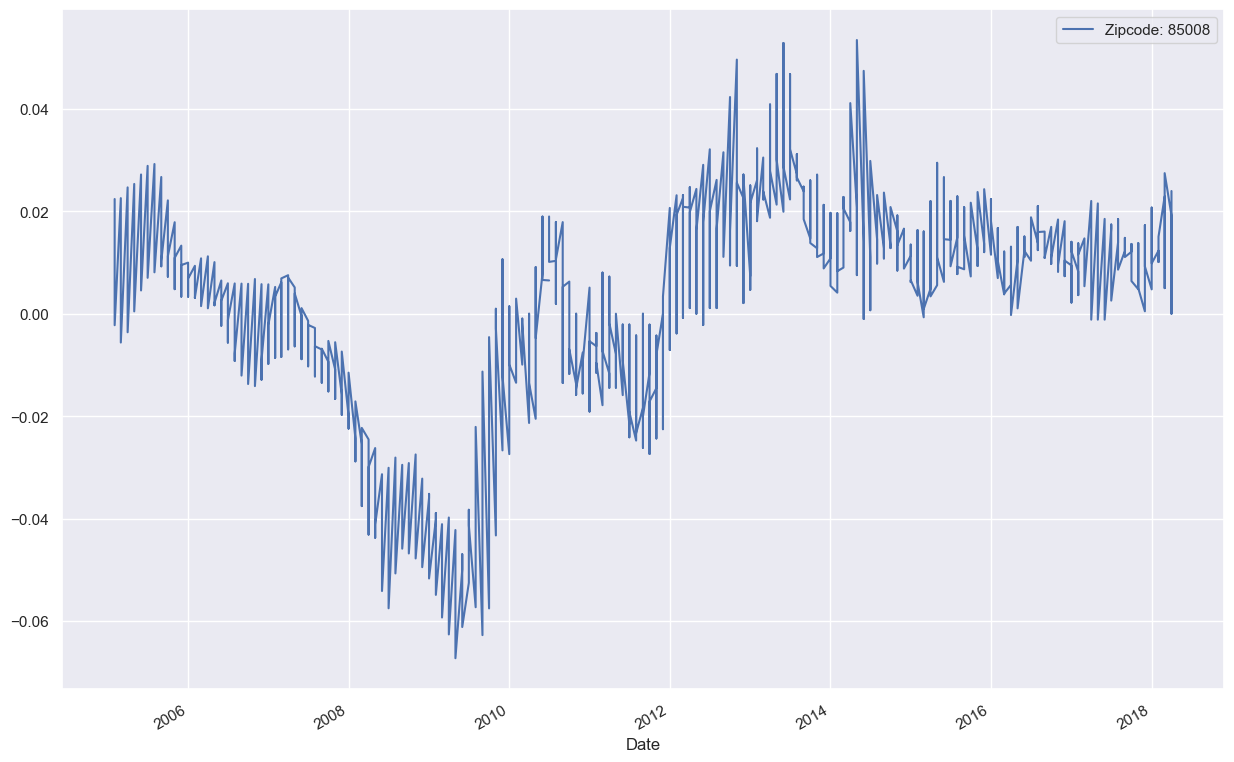

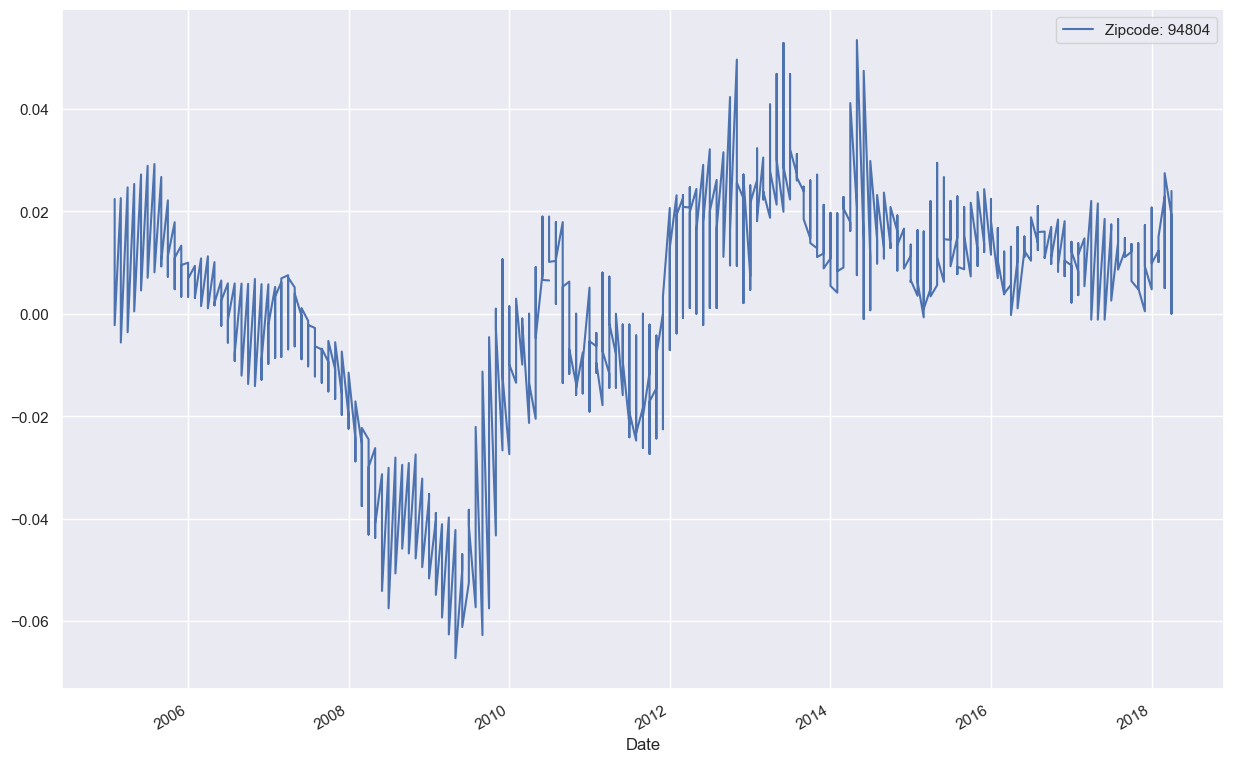

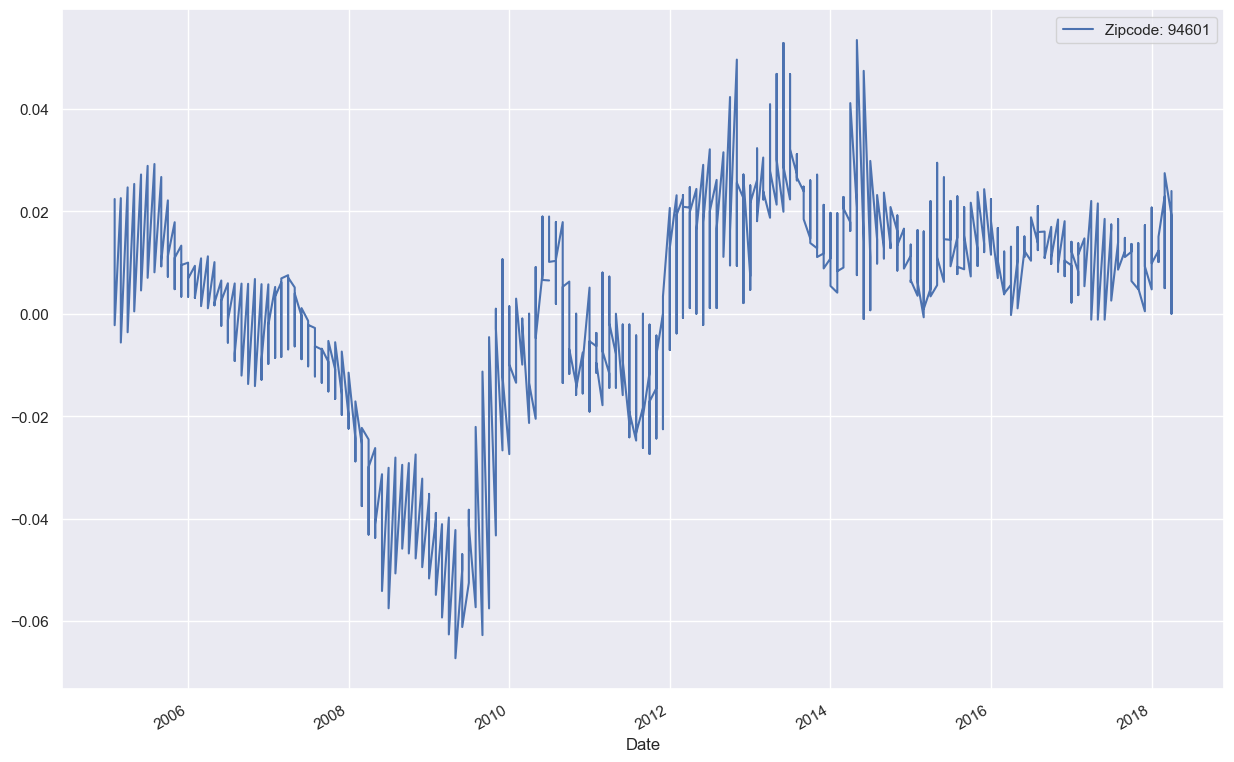

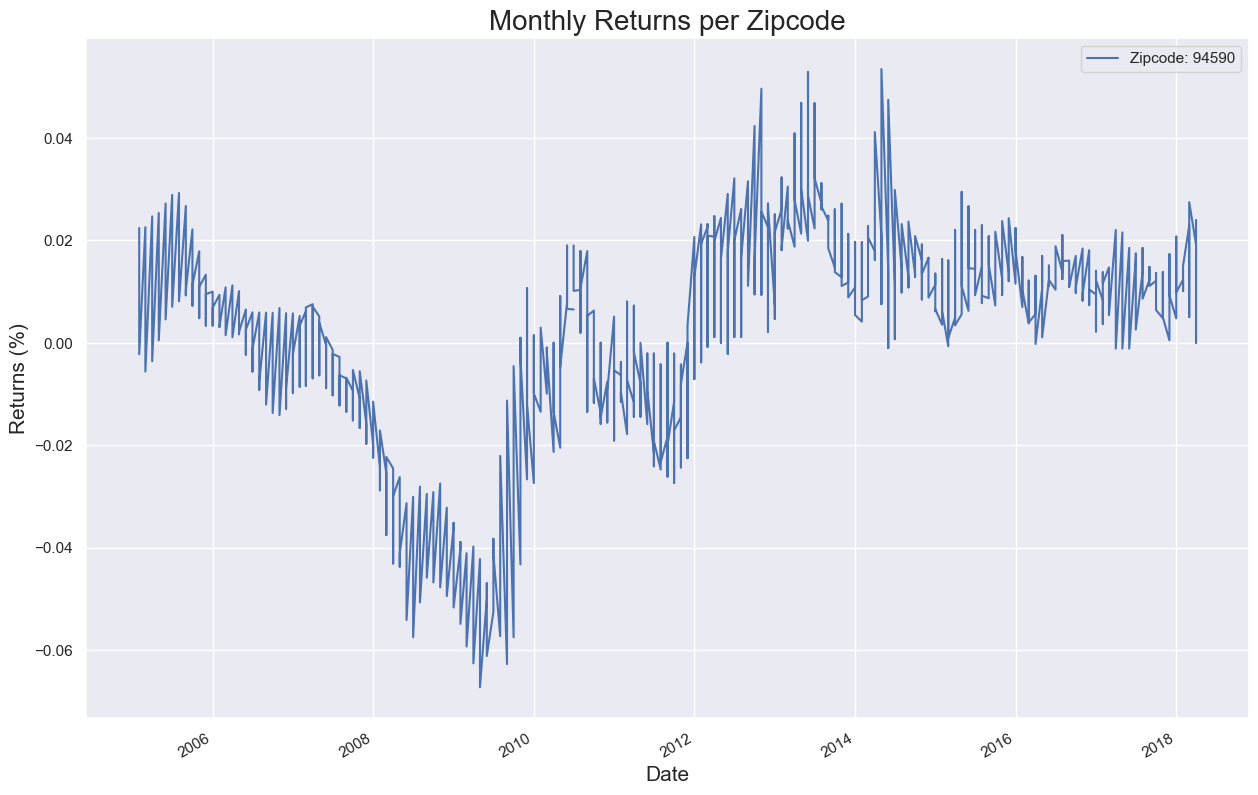

In [37]:
# Creating a column called "ret" representing monthly returns on investment
for i in range(5):
    final_df[f'ret_{i}'] = final_df.groupby('Zipcode')['Price'].pct_change()

# Plot the monthly returns of each zipcode
for i in range(5):
    final_df.plot(y=f'ret_{i}', figsize=(15, 10), label=f"Zipcode: {zipcode[i]}")
plt.title(f'Monthly Returns per Zipcode', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Returns (%)', fontsize=15)
plt.legend(loc='best')
plt.show()


# Checking for Stationarity with Rolling Mean and Standard Deviation: 

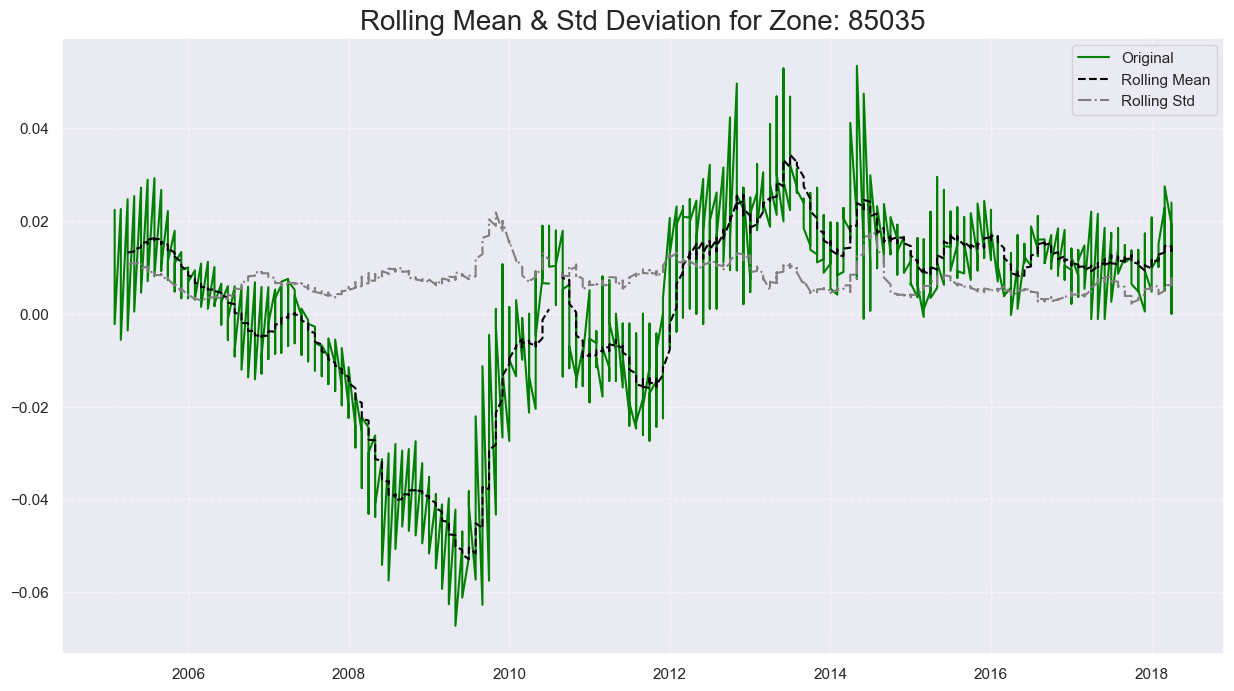

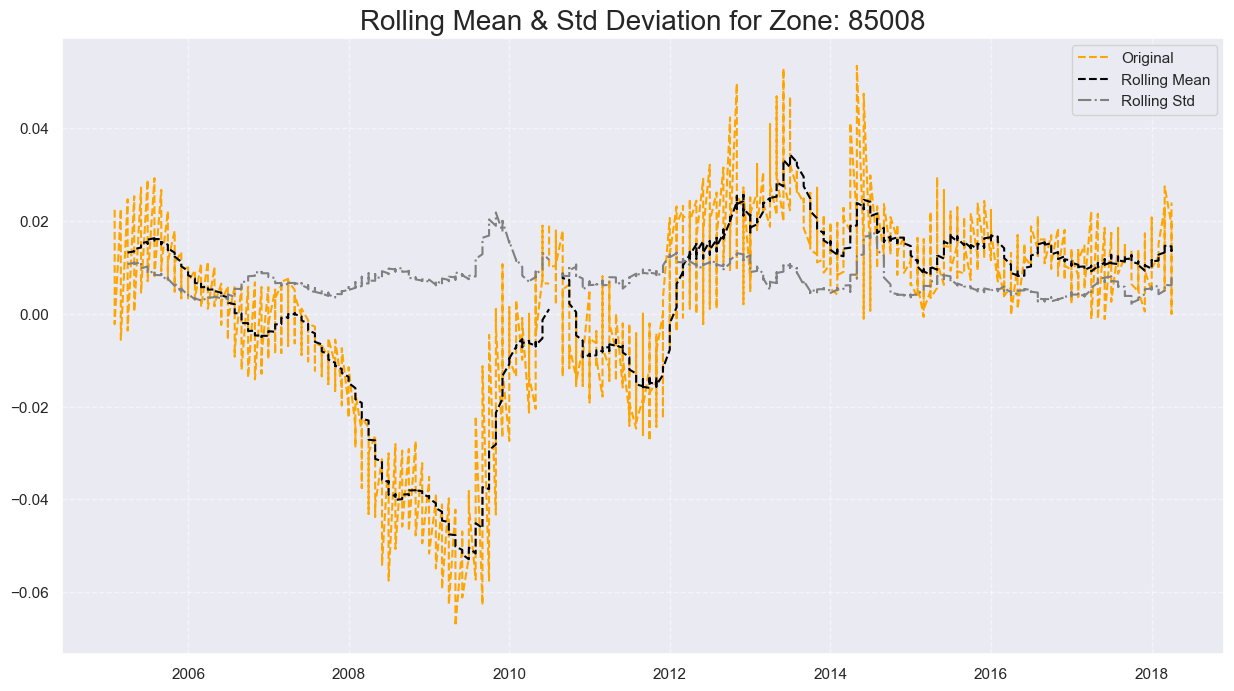

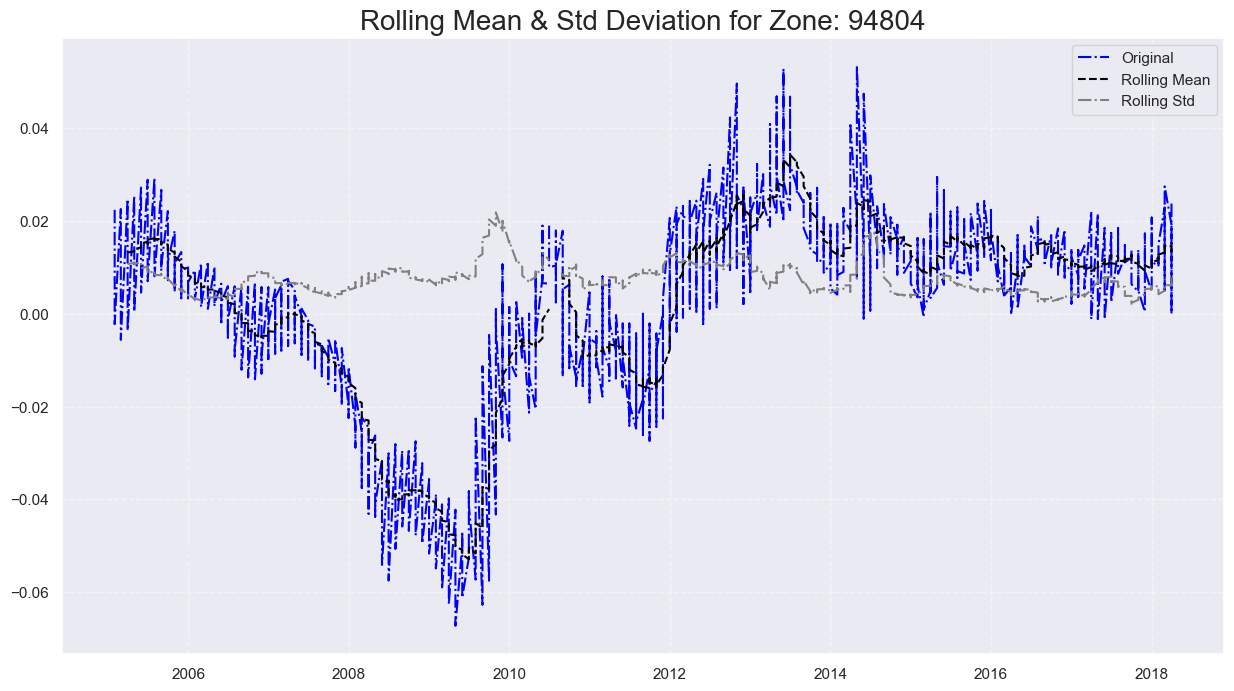

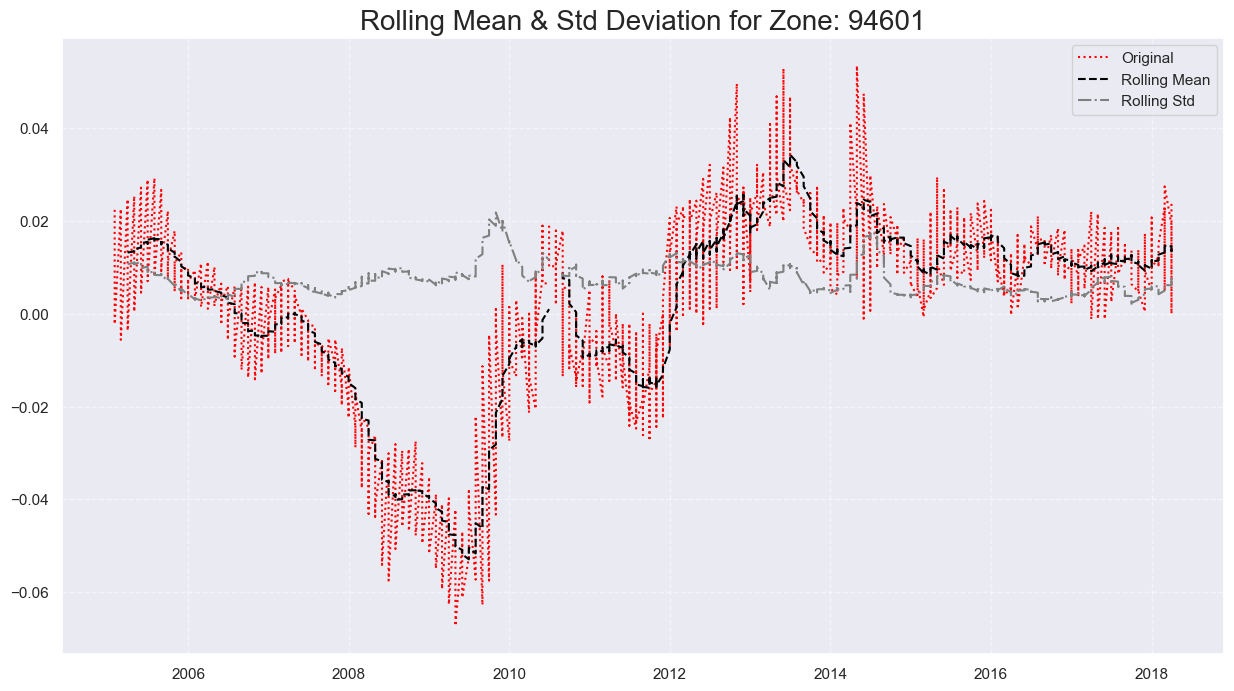

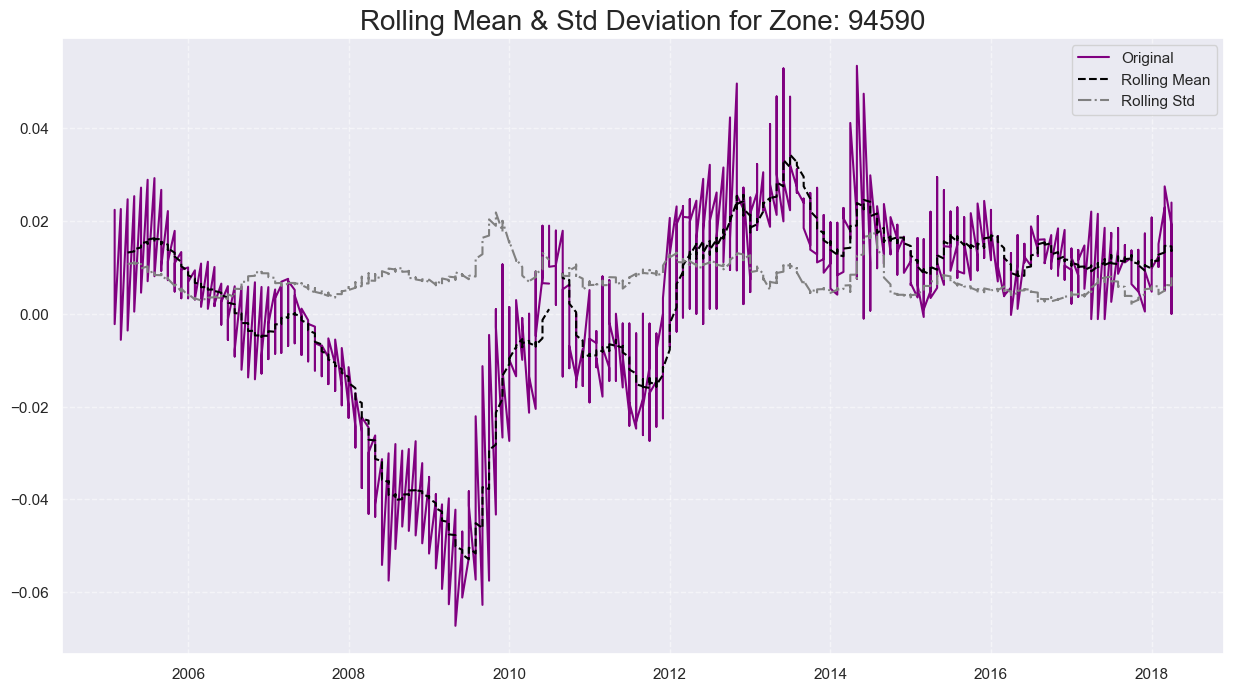

In [38]:
# Plotting rolling mean and standard deviation for each zipcode
for i in range(5):
    rollingmean = final_df[f'ret_{i}'].rolling(window=12, center=False).mean()
    rollingstd = final_df[f'ret_{i}'].rolling(window=12, center=False).std()
    fig = plt.figure(figsize=(15, 8))
    original = plt.plot(final_df[f'ret_{i}'], 
                        color=colors[i],
                        linestyle=line_styles[i],
                        label="Original")
    mean = plt.plot(rollingmean, 
                    color='black',  
                    linestyle='--',  
                    label="Rolling Mean")
    std = plt.plot(rollingstd, 
                   color='grey',  
                   linestyle='-.',  
                   label="Rolling Std")
    plt.legend(loc="best")
    plt.title(f'Rolling Mean & Std Deviation for Zone: {zipcode[i]}', fontsize=20)  #
    plt.grid(True, linestyle='--', alpha=0.5)  
    plt.show()


The above graphs reveal that certain states show non-stationarity. However, to confirm this, a Dickey Fuller test is conducted.

In [39]:
# Create time series data for each zipcode
ts_data = {}
for zc in zipcode:
    ts_data[zc] = final_df[final_df['Zipcode'] == zc]['Price'].diff().dropna()


for zc, data in ts_data.items():
    # Perform Dickey-Fuller test
    results = adfuller(data)
    print(f'ADFuller test p-value for zipcode: {zc}')
    print('p-value:', results[1])
    
    if results[1] > 0.05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
        # Perform differencing
        diff_data = data.diff().dropna()
        # Apply Dickey-Fuller test again
        results_diff = adfuller(diff_data)
        print(f'ADFuller test p-value after differencing for zipcode: {zc}')
        print('p-value:', results_diff[1])
        if results_diff[1] > 0.05:
            print('Fail to reject the null hypothesis even after differencing. Data might need further processing.\n')
        else:
            print('Reject the null hypothesis after differencing. Data is now stationary.\n')
    else:
        print('Reject the null hypothesis. Data is stationary.\n')


ADFuller test p-value for zipcode: 85035
p-value: 0.17025708106463994
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value after differencing for zipcode: 85035
p-value: 0.00023176943551422367
Reject the null hypothesis after differencing. Data is now stationary.

ADFuller test p-value for zipcode: 85008
p-value: 0.37419875504171707
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value after differencing for zipcode: 85008
p-value: 1.015404271894037e-08
Reject the null hypothesis after differencing. Data is now stationary.

ADFuller test p-value for zipcode: 94804
p-value: 0.4056208885955558
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value after differencing for zipcode: 94804
p-value: 1.0827429692103834e-06
Reject the null hypothesis after differencing. Data is now stationary.

ADFuller test p-value for zipcode: 94601
p-value: 0.2874078893413417
Fail to reject the null hypothesis. Data is not 

# Model Perfomance

In [81]:
# Creating individual time series for each zip code
ts_85035 = final_df[final_df['Zipcode'] == zipcode[0]]['Price'].diff().dropna()
ts_85008 = final_df[final_df['Zipcode'] == zipcode[1]]['Price'].diff().dropna()
ts_94590 = final_df[final_df['Zipcode'] == zipcode[2]]['Price'].diff().dropna()
ts_94601 = final_df[final_df['Zipcode'] == zipcode[3]]['Price'].diff().dropna()
ts_94804 = final_df[final_df['Zipcode'] == zipcode[4]]['Price'].diff().dropna()


In [41]:
# Define a function that plots ACF and PACF plots
def acf_pacf_plot(data, alags=40, plags=40):
    """
    Plot ACF and PACF plots for the given data.

    Parameters:
    - data: Time series data for which ACF and PACF plots are to be plotted.
    - alags: Number of lags to consider for ACF plot.
    - plags: Number of lags to consider for PACF plot.
    """
    # Create figure
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))
    
    # Make ACF plot
    plot_acf(data, lags=alags, zero=False, ax=ax1)
    ax1.set_title('Autocorrelation Function (ACF)')
    
    # Make PACF plot
    plot_pacf(data, lags=plags, ax=ax2)
    ax2.set_title('Partial Autocorrelation Function (PACF)')
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


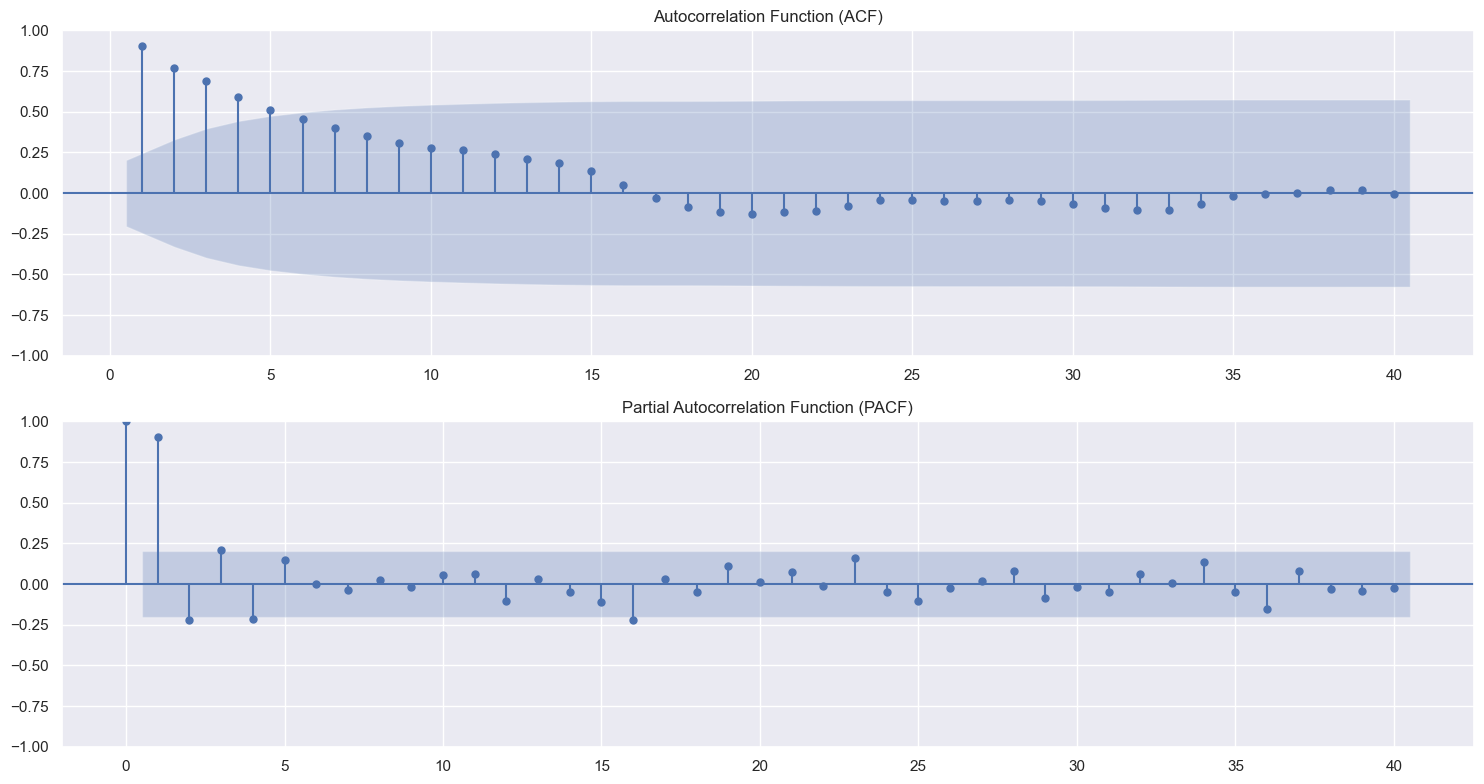

In [42]:
# Plotting ACF and PACF for the time series data related to zipcode 85035
acf_pacf_plot(ts_85035)


In [43]:
# Using auto arima to find the best p,d,q for the model related to zipcode 85035
model = pm.auto_arima(ts_85035, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

# Printing the summary of the best ARIMA model
print("Summary of the best ARIMA model:")
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1329.219, Time=1.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1342.124, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1339.665, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1333.929, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1340.124, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1332.610, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1332.688, Time=0.22 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1331.165, Time=0.26 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1331.162, Time=0.43 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1332.685, Time=0.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1333.242, Time=0.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1333.762, Time=0.27 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1327.218, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Summary of the ARIMA model:
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   54
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -384.015
Date:                Sat, 23 Mar 2024   AIC                            778.030
Time:                        10:01:08   BIC                            787.974
Sample:                    08-01-2010   HQIC                           781.865
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        859.1409    499.142      1.721      0.085    -119.160    1837.442
ar.L1          0.3220      0.189      1.699      0.089      -0.049       0.693
ar.L2          0.5388   

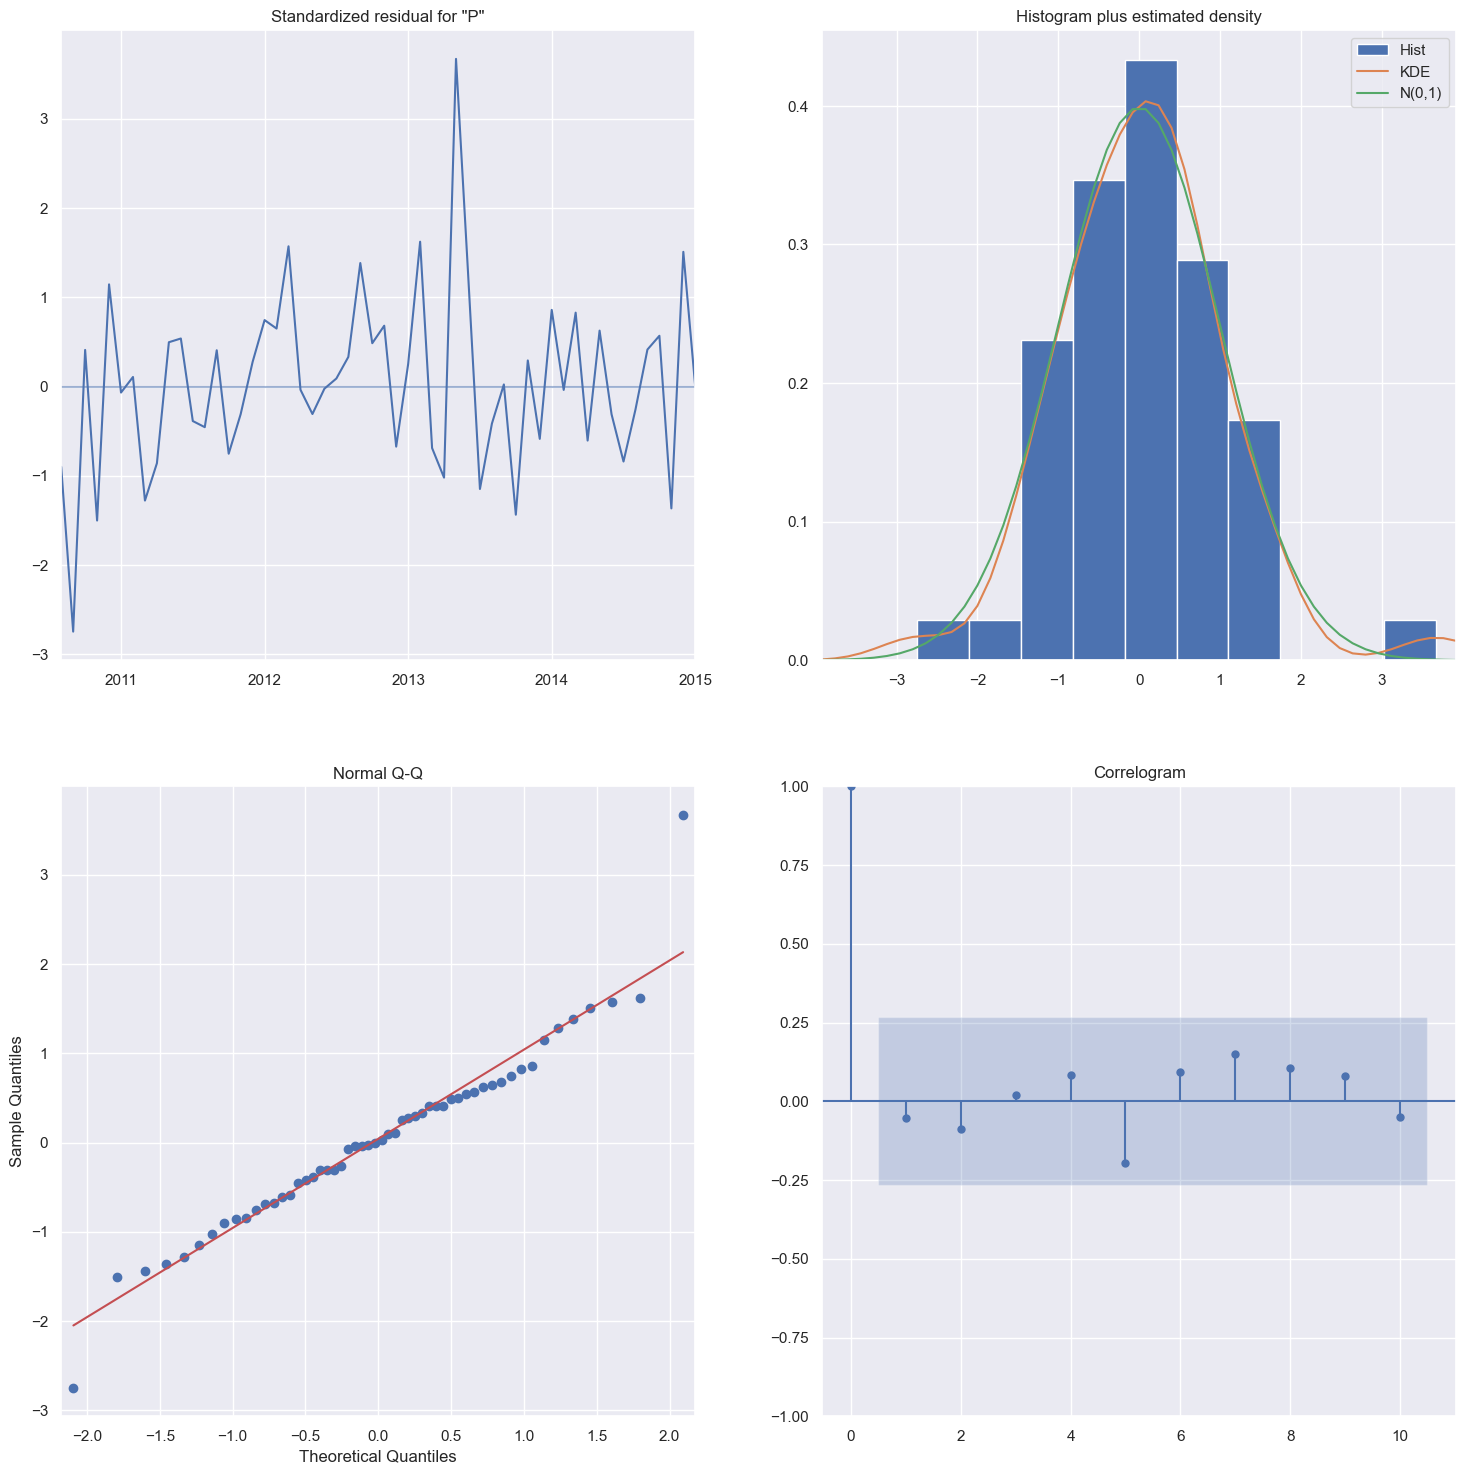

In [44]:
# Splitting the data into train and test sets
train_85035 = ts_85035[:'2015-01']
test_85035 = ts_85035['2015-02':]

# Fitting an ARIMA Model on the training series using parameters from the AUTO ARIMA model
# Initializing ARIMA model with the previously determined order
ARIMAmodel = ARIMA(train_85035, order=(2, 0, 1))

# Fitting the ARIMA model to the training data
ARIMAmodel = ARIMAmodel.fit()

# Printing the summary of the ARIMA model
print("Summary of the ARIMA model:")
print(ARIMAmodel.summary())

# Plotting diagnostics of the ARIMA model
ARIMAmodel.plot_diagnostics(figsize=(18, 18))
plt.show()


The residuals must exhibit no correlation and adhere to a normal distribution to meet the normality assumptions.

The QQ-plot displayed in the lower-left quadrant indicates that the residuals conform to a linear trend line, suggesting a normal distribution.

The correlogram plot in the lower-left quadrant reveals minimal correlations with lagged versions of the residuals, indicating the absence of apparent seasonality in our dataset.

The histogram portrays a bell curve, signifying that the residuals follow a normal distribution, which is favorable.

In [79]:
# Creating a table of the upper and lower limits
pred = ARIMAmodel.get_prediction(start=pd.to_datetime('2015-02'), end=pd.to_datetime('2018-04'), dynamic=False)
pred_conf = pred.conf_int()
pred_conf.head()

,lower Price,upper Price
2015-02-01,562.055400,1695.039003
2015-03-01,283.690244,2083.114199
2015-04-01,64.346793,2153.034759
2015-05-01,-64.879962,2293.259916
2015-06-01,-190.609458,2342.026420


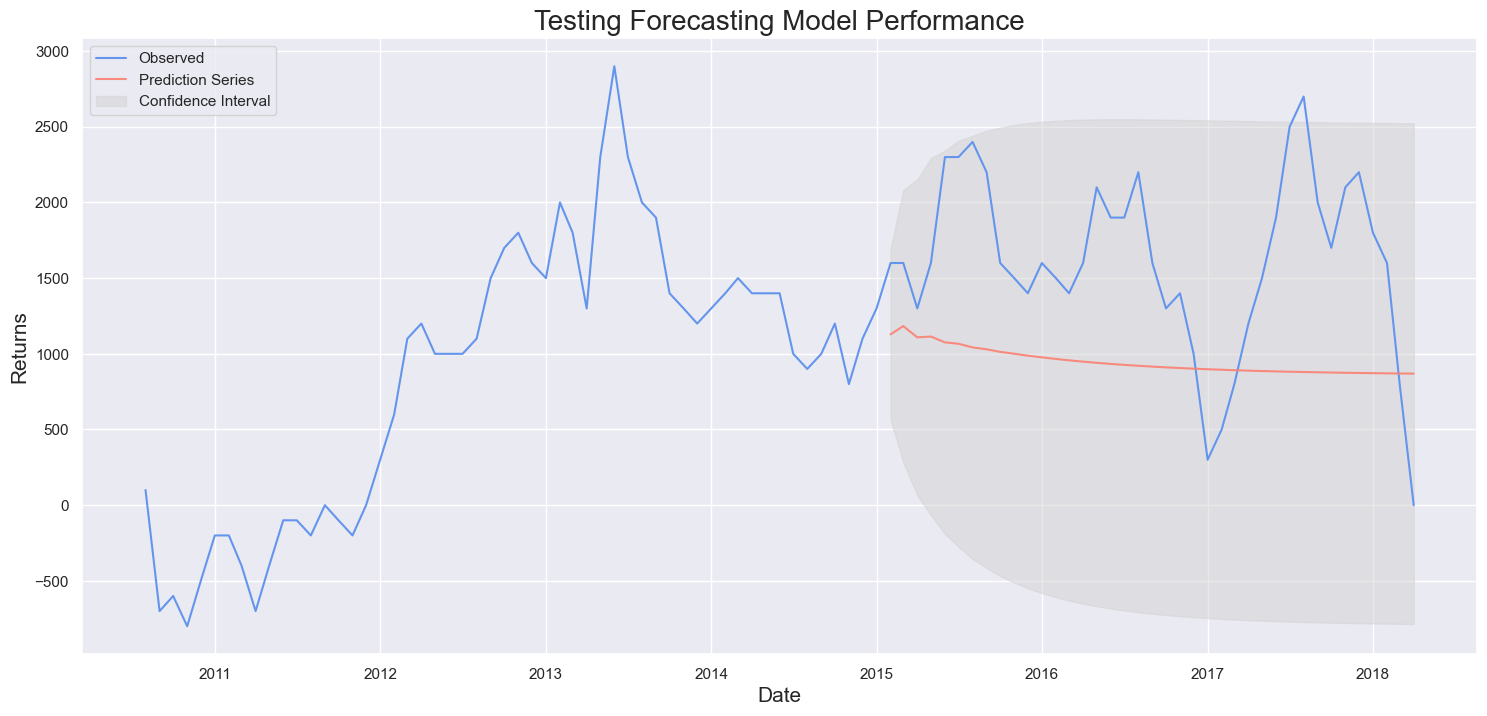

In [78]:

# Plotting the training data against the test data
plt.figure(figsize=(18, 8))

# Plot observed values
plt.plot(ts_85035.index, ts_85035, label='Observed', color="cornflowerblue")

# Plot predicted values
plt.plot(pred.predicted_mean.index, pred.predicted_mean, label='Prediction Series', alpha=0.9, color="salmon")

# Plot the range for confidence intervals
plt.fill_between(pred_conf.index, pred_conf.iloc[:, 0], pred_conf.iloc[:, 1], color='lightgray', alpha=0.5, label='Confidence Interval')

# Set axes labels and title
plt.xlabel('Date', fontsize=15)
plt.ylabel('Returns', fontsize=15)
plt.title('Testing Forecasting Model Performance', fontsize=20)
plt.legend()

plt.show()


### Model Evaluation

In [75]:
# Calculate the RMSE for the model
rmse = mean_squared_error(test_85035, pred.predicted_mean, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 877.1680127925447


###### Forecasting for the next 5 years

In [49]:
# Fit ARIMA model
ARIMA_MODEL = ARIMA(ts_85035, 
                    order=(2,0,1), 
                    enforce_stationarity=False, 
                    enforce_invertibility=False)

# Fit the model and print results
full_output = ARIMA_MODEL.fit()

# Print model summary
print(full_output.summary())

# Forecast for the next 5 years (60 months)
forecast = full_output.get_forecast(steps=60)

# Get the forecasted values and the confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Print forecasted values and confidence intervals
print("Forecasted Values:")
print(forecast_values)
print("\nConfidence Intervals:")
print(confidence_intervals)


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   93
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -647.951
Date:                Sat, 23 Mar 2024   AIC                           1305.901
Time:                        10:12:38   BIC                           1318.455
Sample:                    08-01-2010   HQIC                          1310.966
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1175.5594    354.402      3.317      0.001     480.944    1870.174
ar.L1          0.6670      0.167      4.005      0.000       0.341       0.993
ar.L2          0.1726      0.173      0.997      0.3

In [50]:
# Getting a forecast for the next 60 months after the last recorded date on our dataset.
forecast = full_output.get_forecast(steps=60)
future_prediction = forecast.conf_int()
future_prediction['Price'] = forecast.predicted_mean
future_prediction.columns = ['lower','upper','prediction'] 
future_prediction.head()


,lower,upper,prediction
2018-05-01,-579.684495,590.179851,5.247678
2018-06-01,-791.277240,1175.453884,192.088322
2018-07-01,-849.275092,1484.514506,317.619707
2018-08-01,-858.746850,1725.931462,433.592306
2018-09-01,-845.601641,1910.820766,532.609562


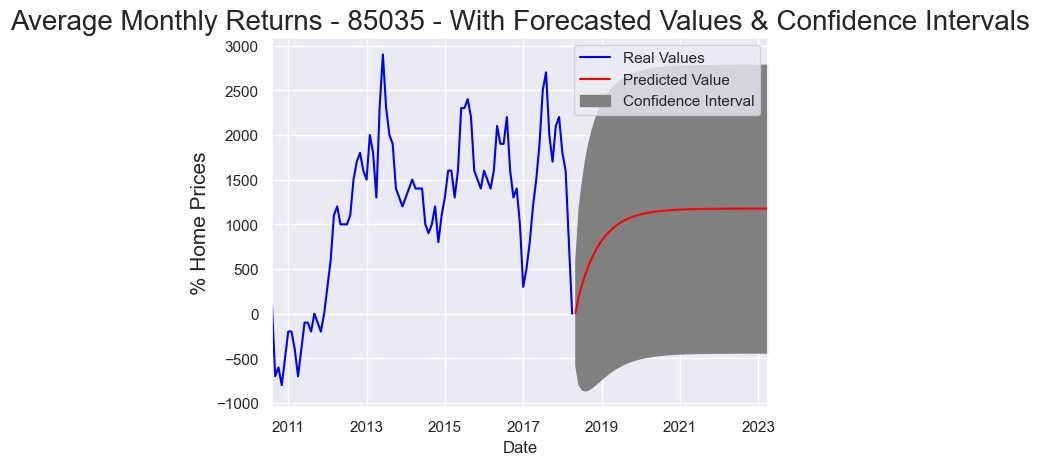

In [51]:
# Plotting our Forecast
fig, ax = plt.subplots()
ts_85035.plot(ax=ax, label='Real Values', c="blue")

future_prediction['prediction'].plot(ax=ax, label='Predicted Value', c="red")

ax.fill_between(x=future_prediction.index, y1=future_prediction['lower'], 
                y2=future_prediction['upper'], color='gray',
                label='Confidence Interval')
ax.legend() 
plt.ylabel("% Home Prices", fontsize=15)
plt.title('Average Monthly Returns - 85035 - With Forecasted Values & Confidence Intervals', fontsize=20)
plt.show()


###### A forecast for every zipcode

In [71]:
zip_predictions = {}

# Iterate over each unique Zipcode in final_df
for zipcode in final_df['Zipcode'].unique():
    # Selecting series for the current Zipcode
    series = final_df[final_df['Zipcode'] == zipcode]['Price']
    
    # Only consider data from 2011 onwards
    recent_series = series['2011':]
    
    # Splitting the last 36 months of our series as a test dataset
    train_series = recent_series[:'2016-04']
    test_series = recent_series['2016-05':]
    
    # Auto ARIMA model
    auto_model = pm.auto_arima(train_series, 
                     trace=True,
                     error_action='ignore',
                     suppress_warnings=True,
                     stepwise=True,
                     with_intercept=False)
   
    # Plug the optimal parameter values for our Training data into a SARIMAX model that fits our entire series
    ARIMA_MODEL = SARIMAX(recent_series, 
                          order=auto_model.order, 
                          seasonal_order=auto_model.seasonal_order, 
                          enforce_stationarity=False, 
                          enforce_invertibility=False)

    # Fit the model
    output = ARIMA_MODEL.fit()

    # Getting a forecast for the next 36 months after the last recorded date on our dataset
    forecast = output.get_forecast(36)
    prediction = forecast.conf_int()
    prediction['Price'] = forecast.predicted_mean
    prediction.columns = ['lower','upper','prediction'] 
    
    # Adding the Zipcode's ROI to the zip_predictions dictionary
    zip_predictions[zipcode] = ((prediction['prediction'][-1]) - (series[-1])) / (series[-1])


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1128.187, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1127.998, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1128.514, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1129.499, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1088.949, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1086.951, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1088.950, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1079.483, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1074.063, Time=0.39 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1090.009, Time=0.19 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1190.554, T

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1038.977, Time=0.42 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1028.674, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1025.075, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1024.273, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1026.272, Time=0.31 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=1026.271, Time=0.14 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=1026.196, Time=0.12 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.376 seconds
Performing stepwise search to minimize aic


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1122.469, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1102.933, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1104.628, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1103.916, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1108.756, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1104.860, Time=0.04 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.386 seconds
Performing stepwise search to minimize aic


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.66 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1091.763, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1099.319, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1109.099, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1114.150, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1093.748, Time=0.03 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.929 seconds
Performing stepwise search to minimize aic


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


 ARIMA(2,2,2)(0,0,0)[0]             : AIC=891.901, Time=0.27 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=885.881, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=886.696, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=886.611, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=888.481, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=887.303, Time=0.03 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.620 seconds


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

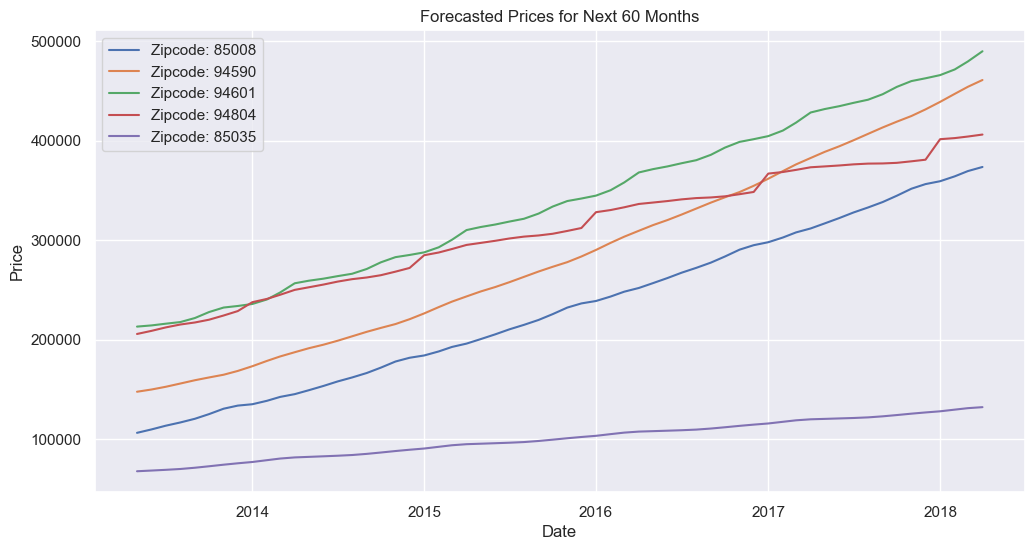

In [74]:

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Initialize dictionary to store forecasted values
forecast_values = {}

# Create a for loop to forecast for every zipcode
for zipcode in final_df['Zipcode'].unique():
    # Selecting the series for the current zipcode
    series = final_df[final_df['Zipcode'] == zipcode]['Price']
    
    # Splitting the data into training and testing sets
    train_series = series[:-60]  # Use all data except the last 60 months for training
    test_series = series[-60:]   # Use the last 60 months for testing
    
    # Fit SARIMAX model
    model = SARIMAX(train_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    fitted_model = model.fit()
    
    # Forecast for the next 60 months
    forecast = fitted_model.forecast(steps=60)
    
    # Store forecasted values in the dictionary
    forecast_values[zipcode] = forecast

# Convert the dictionary to a DataFrame
forecast_df = pd.DataFrame(forecast_values)

# Plot the forecasted values
plt.figure(figsize=(12, 6))
for zipcode in forecast_df.columns:
    plt.plot(forecast_df.index, forecast_df[zipcode], label=f'Zipcode: {zipcode}')
plt.title('Forecasted Prices for Next 60 Months')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


##### Conclusion and Recommendation 

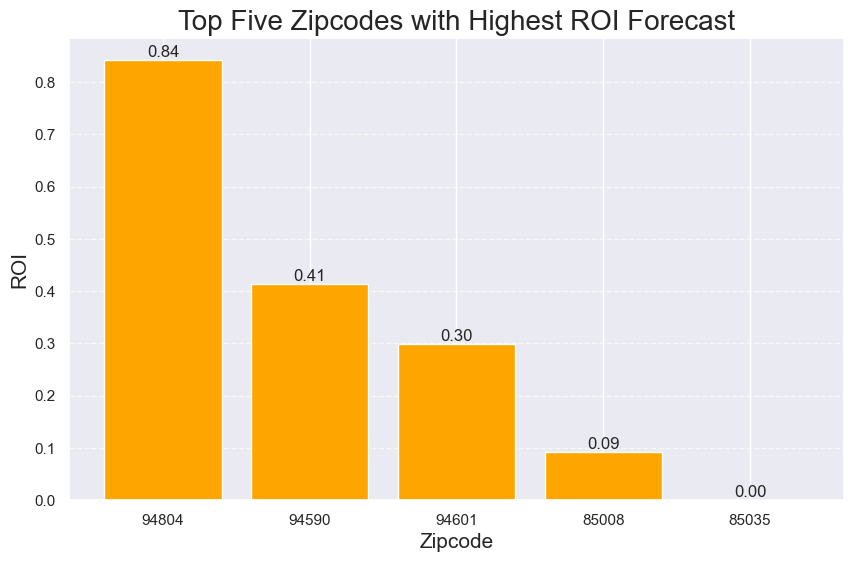

<Figure size 640x480 with 0 Axes>

In [73]:
# Get the top five zipcodes with the highest ROI
top_zipcodes = sorted(zip_predictions, key=zip_predictions.get, reverse=True)[:5]

# Create a list of ROI values for the top five zipcodes
roi_values = [zip_predictions[zipcode] for zipcode in top_zipcodes]

# Create a bar graph of the top five zipcodes and their corresponding ROI values
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bars = plt.bar(top_zipcodes, roi_values, color='orange')  # Change bar color to orange

# Add data labels to the bars
for bar, roi in zip(bars, roi_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{roi:.2f}', 
             ha='center', va='bottom', fontsize=12)

# Set plot labels and title
plt.xlabel('Zipcode', fontsize=15)
plt.ylabel('ROI', fontsize=15)
plt.title('Top Five Zipcodes with Highest ROI Forecast', fontsize=20)

# Add grid for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()
plt.gcf().canvas.draw()  # Explicitly draw the figure


Based on the graph depicted above, it's evident that the forecasted ROI for the zipcode 94804 is the highest among the top five zipcodes. Therefore, it would be advantageous for the investor to consider investing in this particular zipcode.

All Zipcodes exhibit promising forecasted prices, with positive trends, except for the 85035 zipcode.
Based on the presented graph, we derive our top five recommendations along with their anticipated ROI over a three-year period.
Consequently, the investor has the option to consider investing in any of the aforementioned zipcodes, except for 85035, which lacks a positive return on investment.